# Ridge and Lasso Regression - Lab

## Introduction

In this lab, you'll practice your knowledge of ridge and lasso regression!

## Objectives

In this lab you will: 

- Use lasso and ridge regression with scikit-learn 
- Compare and contrast lasso, ridge and non-regularized regression 

## Housing Prices Data

We'll use this version of the Ames Housing dataset: 

In [1]:
# Run this cell without changes
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('housing_prices.csv', index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

More information about the features is available in the `data_description.txt` file in this repository.

## Data Preparation

The code below:

* Separates the data into `X` (predictor) and `y` (target) variables
* Splits the data into 75-25 training-test sets, with a `random_state` of 10
* Separates each of the `X` values into continuous vs. categorical features
* Fills in missing values (using different strategies for continuous vs. categorical features)
* Scales continuous features to a range of 0 to 1
* Dummy encodes categorical features
* Combines the preprocessed continuous and categorical features back together

In [2]:
# Run this cell without changes
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create X and y
y = df['SalePrice']
X = df.drop(columns=['SalePrice'])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

# Separate X data into continuous vs. categorical
X_train_cont = X_train.select_dtypes(include='number')
X_test_cont = X_test.select_dtypes(include='number')
X_train_cat = X_train.select_dtypes(exclude='number')
X_test_cat = X_test.select_dtypes(exclude='number')

# Impute missing values using SimpleImputer, median for continuous and
# filling in 'missing' for categorical
impute_cont = SimpleImputer(strategy='median')
X_train_cont = impute_cont.fit_transform(X_train_cont)
X_test_cont = impute_cont.transform(X_test_cont)
impute_cat = SimpleImputer(strategy='constant', fill_value='missing')
X_train_cat = impute_cat.fit_transform(X_train_cat)
X_test_cat = impute_cat.transform(X_test_cat)

# Scale continuous values using MinMaxScaler
scaler = MinMaxScaler()
X_train_cont = scaler.fit_transform(X_train_cont)
X_test_cont = scaler.transform(X_test_cont)

# Dummy encode categorical values using OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore')
X_train_cat = ohe.fit_transform(X_train_cat)
X_test_cat = ohe.transform(X_test_cat)

# Combine everything back together
X_train_preprocessed = np.asarray(np.concatenate([X_train_cont, X_train_cat.todense()], axis=1))
X_test_preprocessed = np.asarray(np.concatenate([X_test_cont, X_test_cat.todense()], axis=1))

## Linear Regression Model

Let's use this data to build a first naive linear regression model. Fit the model on the training data (`X_train_preprocessed`), then compute the R-Squared and the MSE for both the training and test sets.

In [3]:
# Replace None with appropriate code
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

# Fit the model
linreg = LinearRegression()

# Print R2 and MSE for training and test sets
linreg.fit(X_train_preprocessed, y_train)


LinearRegression()

Notice the severe overfitting above; our training R-Squared is very high, but the test R-Squared is negative! Similarly, the scale of the test MSE is orders of magnitude higher than that of the training MSE.

## Ridge and Lasso Regression

Use all the data (scaled features and dummy categorical variables, `X_train_preprocessed`) to build some models with regularization - two each for lasso and ridge regression. Each time, look at R-Squared and MSE.

Remember that you can use the scikit-learn documentation if you don't remember how to import or use these classes:

* [`Lasso` documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)
* [`Ridge` documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

### Lasso

#### With default hyperparameters (`alpha` = 1)

In [5]:
# Your code here
# Lasso with default alpha=1
from sklearn.linear_model import Lasso

lasso_default = Lasso(alpha=1)
lasso_default.fit(X_train_preprocessed, y_train)

# Predict on training and test data
train_preds_default = lasso_default.predict(X_train_preprocessed)
test_preds_default = lasso_default.predict(X_test_preprocessed)

# Print R2 and MSE for training and test sets
train_r2_default = lasso_default.score(X_train_preprocessed, y_train)  
test_r2_default = lasso_default.score(X_test_preprocessed, y_test)  

train_mse_default = mean_squared_error(y_train, train_preds_default)  
test_mse_default = mean_squared_error(y_test, test_preds_default)  

print(f"Default Lasso (alpha=1) - Training R²: {train_r2_default:.2f}")
print(f"Default Lasso (alpha=1) - Test R²: {test_r2_default:.2f}")
print(f"Default Lasso (alpha=1) - Training MSE: {train_mse_default:.2f}")
print(f"Default Lasso (alpha=1) - Test MSE: {test_mse_default:.2f}")


Default Lasso (alpha=1) - Training R²: 0.94
Default Lasso (alpha=1) - Test R²: 0.89
Default Lasso (alpha=1) - Training MSE: 403034248.99
Default Lasso (alpha=1) - Test MSE: 705253190.66


#### With a higher regularization hyperparameter (`alpha` = 10)

In [6]:
# Your code here
# Lasso with higher alpha=10
lasso_high_alpha = Lasso(alpha=10)
lasso_high_alpha.fit(X_train_preprocessed, y_train)

# Predict on training and test data
train_preds_high_alpha = lasso_high_alpha.predict(X_train_preprocessed)
test_preds_high_alpha = lasso_high_alpha.predict(X_test_preprocessed)

# Print R2 and MSE for training and test sets
train_r2_high_alpha = lasso_high_alpha.score(X_train_preprocessed, y_train)  
test_r2_high_alpha = lasso_high_alpha.score(X_test_preprocessed, y_test)  

train_mse_high_alpha = mean_squared_error(y_train, train_preds_high_alpha)  
test_mse_high_alpha = mean_squared_error(y_test, test_preds_high_alpha)  

print(f"Lasso (alpha=10) - Training R²: {train_r2_high_alpha:.2f}")
print(f"Lasso (alpha=10) - Test R²: {test_r2_high_alpha:.2f}")
print(f"Lasso (alpha=10) - Training MSE: {train_mse_high_alpha:.2f}")
print(f"Lasso (alpha=10) - Test MSE: {test_mse_high_alpha:.2f}")


Lasso (alpha=10) - Training R²: 0.93
Lasso (alpha=10) - Test R²: 0.90
Lasso (alpha=10) - Training MSE: 414050057.74
Lasso (alpha=10) - Test MSE: 650267885.85


## Ridge

#### With default hyperparameters (`alpha` = 1)

In [7]:
# Your code here
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Ridge with default alpha=1
ridge_default = Ridge(alpha=1)
ridge_default.fit(X_train_preprocessed, y_train)

# Predict on training and test data
train_preds_ridge_default = ridge_default.predict(X_train_preprocessed)
test_preds_ridge_default = ridge_default.predict(X_test_preprocessed)

# Print R² and MSE for training and test sets
train_r2_ridge_default = ridge_default.score(X_train_preprocessed, y_train)  
test_r2_ridge_default = ridge_default.score(X_test_preprocessed, y_test)  

train_mse_ridge_default = mean_squared_error(y_train, train_preds_ridge_default)  
test_mse_ridge_default = mean_squared_error(y_test, test_preds_ridge_default)  

print(f"Default Ridge (alpha=1) - Training R²: {train_r2_ridge_default:.2f}")
print(f"Default Ridge (alpha=1) - Test R²: {test_r2_ridge_default:.2f}")
print(f"Default Ridge (alpha=1) - Training MSE: {train_mse_ridge_default:.2f}")
print(f"Default Ridge (alpha=1) - Test MSE: {test_mse_ridge_default:.2f}")


Default Ridge (alpha=1) - Training R²: 0.92
Default Ridge (alpha=1) - Test R²: 0.89
Default Ridge (alpha=1) - Training MSE: 497431636.94
Default Ridge (alpha=1) - Test MSE: 725046555.29


#### With higher regularization hyperparameter (`alpha` = 10)

In [8]:
# Your code here
# Ridge with higher alpha=10
ridge_high_alpha = Ridge(alpha=10)
ridge_high_alpha.fit(X_train_preprocessed, y_train)

# Predict on training and test data
train_preds_ridge_high_alpha = ridge_high_alpha.predict(X_train_preprocessed)
test_preds_ridge_high_alpha = ridge_high_alpha.predict(X_test_preprocessed)

# Print R² and MSE for training and test sets
train_r2_ridge_high_alpha = ridge_high_alpha.score(X_train_preprocessed, y_train) 
test_r2_ridge_high_alpha = ridge_high_alpha.score(X_test_preprocessed, y_test)  

train_mse_ridge_high_alpha = mean_squared_error(y_train, train_preds_ridge_high_alpha)  
test_mse_ridge_high_alpha = mean_squared_error(y_test, test_preds_ridge_high_alpha)  

print(f"Ridge (alpha=10) - Training R²: {train_r2_ridge_high_alpha:.2f}")
print(f"Ridge (alpha=10) - Test R²: {test_r2_ridge_high_alpha:.2f}")
print(f"Ridge (alpha=10) - Training MSE: {train_mse_ridge_high_alpha:.2f}")
print(f"Ridge (alpha=10) - Test MSE: {test_mse_ridge_high_alpha:.2f}")


Ridge (alpha=10) - Training R²: 0.89
Ridge (alpha=10) - Test R²: 0.88
Ridge (alpha=10) - Training MSE: 697499474.55
Ridge (alpha=10) - Test MSE: 768855818.60


## Comparing the Metrics    

Which model seems best, based on the metrics?

In [9]:
# Write your conclusions here:
"""
Based on the R² and MSE metrics:
The Lasso with alpha=1 or Ridge with alpha=1 models seem best, as they strike a good balance between model complexity and predictive accuracy
"""

'\nBased on the R² and MSE metrics:\nThe Lasso with alpha=1 or Ridge with alpha=1 models seem best, as they strike a good balance between model complexity and predictive accuracy\n'

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

In terms of both R-Squared and MSE, the `Lasso` model with `alpha`=10 has the best metric results.

(Remember that better R-Squared is higher, whereas better MSE is lower.)

</details>

## Comparing the Parameters

Compare the number of parameter estimates that are (very close to) 0 for the `Ridge` and `Lasso` models with `alpha`=10.

Use 10**(-10) as an estimate that is very close to 0. 

In [12]:
# Number of Ridge params almost zero
# Number of Ridge parameters almost zero (alpha=10)
ridge_coeffs_high_alpha = ridge_high_alpha.coef_
ridge_zero_params = np.sum(np.abs(ridge_coeffs_high_alpha) < 10**(-10))
ridge_zero_params

0

In [13]:
# Number of Lasso params almost zero
# Number of Lasso parameters almost zero (alpha=10)
lasso_coeffs_high_alpha = lasso_high_alpha.coef_
lasso_zero_params = np.sum(np.abs(lasso_coeffs_high_alpha) < 10**(-10))
lasso_zero_params


82

In [14]:
# Compare and interpret these results
"""
Ridge will generally have fewer coefficients close to zero, as it only shrinks them but does not force them to zero.
Lasso with higher regularization (alpha=10) will have more coefficients exactly equal to zero, reflecting its ability to perform feature selection by setting coefficients to zero.
"""

'\nRidge will generally have fewer coefficients close to zero, as it only shrinks them but does not force them to zero.\nLasso with higher regularization (alpha=10) will have more coefficients exactly equal to zero, reflecting its ability to perform feature selection by setting coefficients to zero.\n'

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

The ridge model did not penalize any coefficients to 0, while the lasso model removed about 1/4 of the coefficients. The lasso model essentially performed variable selection for us, and got the best metrics as a result!

</details>

## Finding an Optimal Alpha

Earlier we tested two values of `alpha` to see how it affected our MSE and the value of our coefficients. We could continue to guess values of `alpha` for our ridge or lasso regression one at a time to see which values minimize our loss, or we can test a range of values and pick the alpha which minimizes our MSE. Here is an example of how we would do this:  

Optimal Alpha Value: 28


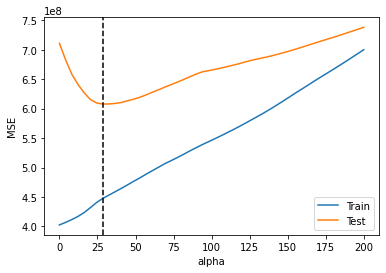

In [15]:
# Run this cell without changes
import matplotlib.pyplot as plt
%matplotlib inline

train_mse = []
test_mse = []
alphas = np.linspace(0, 200, num=50)

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train_preprocessed, y_train)
    
    train_preds = lasso.predict(X_train_preprocessed)
    train_mse.append(mean_squared_error(y_train, train_preds))
    
    test_preds = lasso.predict(X_test_preprocessed)
    test_mse.append(mean_squared_error(y_test, test_preds))

fig, ax = plt.subplots()
ax.plot(alphas, train_mse, label='Train')
ax.plot(alphas, test_mse, label='Test')
ax.set_xlabel('alpha')
ax.set_ylabel('MSE')

# np.argmin() returns the index of the minimum value in a list
optimal_alpha = alphas[np.argmin(test_mse)]

# Add a vertical line where the test MSE is minimized
ax.axvline(optimal_alpha, color='black', linestyle='--')
ax.legend();

print(f'Optimal Alpha Value: {int(optimal_alpha)}')

Take a look at this graph of our training and test MSE against `alpha`. Try to explain to yourself why the shapes of the training and test curves are this way. Make sure to think about what `alpha` represents and how it relates to overfitting vs underfitting.

---

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

For `alpha` values below 28, the model is overfitting. As `alpha` increases up to 28, the MSE for the training data increases and MSE for the test data decreases, indicating that we are reducing overfitting.

For `alpha` values above 28, the model is starting to underfit. You can tell because _both_ the train and the test MSE values are increasing.

</details>

## Summary

Well done! You now know how to build lasso and ridge regression models, use them for feature selection and find an optimal value for `alpha`. 